In [10]:
import multiprocessing as mp
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from matplotlib import pyplot as plt
import numpy as np
import time
import math
import json

In [ ]:
class PE:
  def __init__(self, positions, sha, label, ne, NP):
    self.psitions = positions #np.mod(positions[:2],[200,200]) #n-ary position
    self.label = label
    self.sha = sha
    self.NE = ne
    self.NP = NP

  def __str__(self):
    return f"{{\"sha256\": \"{self.sha}\", \"histogram\": {self.psitions}, \"label\": {self.label}, \"NE\": \"{self.NE}\", \"NP\": {self.NP}}}"
  
def get_result(result):
    global results
    results.append(result)

def NE(Obj, listah):
  dist = 0

  for i in range(0, len(listah)):
    if Obj.label != listah[i].label:
      Obj.NE = listah[i].sha
      Obj.NP = i
      dist = math.dist(Obj.psitions, listah[i].psitions)
      break

  for i in range(0, len(listah)):
    if Obj.label != listah[i].label and dist > math.dist(Obj.psitions, listah[i].psitions):
      dist = math.dist(Obj.psitions, listah[i].psitions)
      Obj.NE = listah[i].sha
      Obj.NP = i

  with open("NE_result.jsonl", "a") as f:
    f.write(str(Obj) + "\n")
  f.close()

  return Obj

if __name__ == '__main__':
  mylist = []
  results = []

  with open("train_features_1.jsonl", "r") as json_file:
    data = [json.loads(line) for line in json_file]
  json_file.close

  for json_str in data:
    mylist.append(PE(json_str['histogram'], json_str['sha256'], -1, -1, -1))

  mistah_listah = np.array(mylist)

  #################################################################################

  plotdata = []
  
  for i in mistah_listah:
    plotdata.append(i.psitions)

  #plotdata = np.array(plotdata).reshape(len(mistah_listah),2)

  clustering = DBSCAN(eps=0.5, min_samples=2).fit(plotdata)

  for i, j in zip(mistah_listah, clustering.labels_):
    i.label = j

  with open("clustering_result_0.jsonl", "a") as f:
    for i, j in zip(mistah_listah, plotdata):
      i.psitions = np.array(j).tolist()
      f.write(str(i) + "\n")
  f.close()

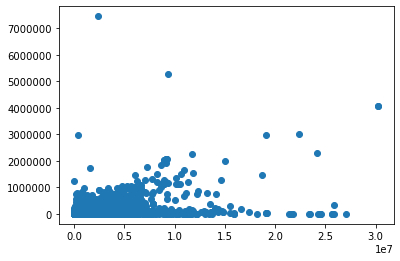

In [19]:
data = []
plotdata = []
X = []
Y = []

with open("train_features_1.jsonl", "r") as json_file:
    data = [json.loads(line) for line in json_file]
json_file.close

for json_str in data:
    plotdata.append(json_str['histogram'][:2])

for i in plotdata:
    X.append(i[0])

for i in plotdata:
    Y.append(i[1])


plt.scatter(X, Y)
plt.show()